## Clasificacion con Naive Bayes


In [2]:
import pandas as pd


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
solicitantes = pd.read_excel('/content/drive/MyDrive/ANALITICA DE DATOS /0. SolicitantesCrédito (1).xlsx')

In [5]:
solicitantes

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Estrato,Nivel de estudios,Tipo de contrato,Ingresos,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
0,1,38,NR,Casado,1,0,3,Bachiller,Ninguno,5424576,...,48,82691.506204,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.041659,582.478943,0.063702
1,2,51,NR,Separado,6,1,4,Técnico,Ninguno,1144064,...,36,22781.212598,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1.0,0.234951,479.839966,0.465636
2,3,37,Mujer,Casado,2,0,3,Tecnólogo,Indefinido,2069853,...,36,46294.596244,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,0.0,0.170330,417.653107,0.290071
3,4,29,NR,Separado,1,0,2,Tecnólogo,Ninguno,1893080,...,24,69564.950015,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.201659,316.791107,0.278389
4,5,42,Mujer,Casado,3,4,2,Especializacion,Ninguno,3000367,...,24,112478.307883,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.140929,441.809570,0.203359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,8374,31,Hombre,Soltero,2,0,5,Bachiller,Indefinido,5891088,...,48,115108.056436,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.035120,659.471375,0.066962
8374,8375,38,Hombre,Separado,0,0,3,Bachiller,Labor Contratada,3092079,...,36,96789.562091,Buenas Referencias,Sin Codeudor,Prop.sin Hipoteca,Con Experiencia sin Mora,1.0,0.101976,465.011536,0.165936
8375,8376,43,Mujer,Casado,1,2,2,Tecnólogo,Ninguno,2542007,...,36,49713.608249,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,1.0,0.156707,423.237305,0.247763
8376,8377,37,Mujer,Casado,1,2,3,Tecnólogo,Indefinido,5677067,...,36,163602.818587,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,1.0,0.037719,592.670837,0.051356


### 2. Limpiamos los datos

In [6]:
solicitantes.shape

(8378, 35)

In [7]:
##Eliminar los registros donde preApr esta vacio
XD = solicitantes.dropna(subset=['PreApr'])

In [8]:
## Escojo solo las variables que voy a usar como independientes.
XD = XD[['Edad','Ingresos','Egresos','Monto (EAD)']]

In [9]:
##Escojo la variable dependiente
yd = solicitantes['PreApr'].dropna()

In [10]:
print(yd)

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
8371    1.0
8373    1.0
8374    1.0
8375    1.0
8376    1.0
Name: PreApr, Length: 5842, dtype: float64


### 3. Implementamos el modelo de Naive Bayes


In [11]:
### Importamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB


In [12]:
### Convierto los datasets a arrays
XDArray = np.array(XD)
ydArray = np.array(yd)

In [13]:
### ENTRENAMOS EL MODELO (Fase Train)
modeloNB = GaussianNB() ## Variable que aloja el modelo
modeloNB.fit(XDArray,ydArray)


GaussianNB()

In [14]:
## Predecimos los yd (Etapa test)
ydPred = modeloNB.predict(XDArray)

### 4 Matriz de confusion


In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [28]:
cm = confusion_matrix(ydArray,ydPred)
cm

array([[2503,  456],
       [ 938, 1945]])

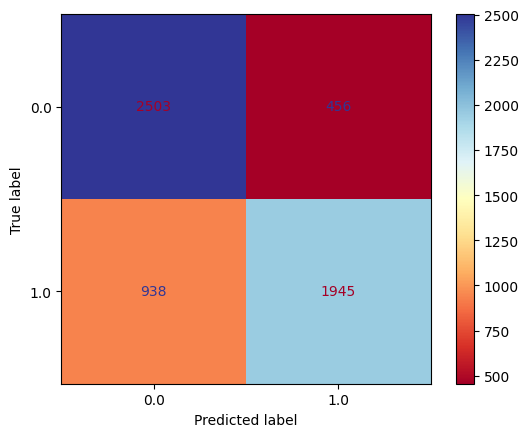

In [30]:
disp = ConfusionMatrixDisplay(cm, display_labels=modeloNB.classes_)
disp.plot(cmap='RdYlBu')
plt.show()


### 5.Metricas de  evaluacion del Modelo


In [17]:
## Extraigo los valores de la matriz de confusion
VN = cm[0,0] ; FP = cm[0,1]; FN = cm[1,0]; VP = cm[1,1];


In [19]:
### Exactitud
exactitud = (VP + VN) / cm.sum()

## Error
error = (FP + FN) / cm.sum()

## Sensibilidad
sensibilidad = VP / (VP + FN)

##Precision
precision = VP / (VP + FP)

##Espisificidad
especificidad = VN / (VN + FP)

In [20]:
print(f'la exactitud del modelo es de {exactitud:.2%}')
print(f'el error del modelo es de {error:.2%}')
print(f'la sensibilidad del modelo es de {sensibilidad:.2%}')
print(f'la precision del modelo es de {precision:.2%}')
print(f'la especificidad del modelo es de {especificidad:.2%}')


la exactitud del modelo es de 76.14%
el error del modelo es de 23.86%
la sensibilidad del modelo es de 67.46%
la precision del modelo es de 81.01%
la especificidad del modelo es de 84.59%


### 6.Generalizacion del modelo
(pronostico para solicitatnes nuevos)

In [21]:
XDGener = solicitantes[solicitantes['PreApr'].isna()]
XDGener

,Unnamed: 0,Edad,Sexo,Estado civil,Hijos,Perscargo,Estrato,Nivel de estudios,Tipo de contrato,Ingresos,...,Plazo,Cuota (COP),ConoCliente,Garantia,RespPat,MoraCome,PreApr,Prob.Default (PD),Score,LGD
6,7,38,NR,Soltero,3,0,3,Profesional,Indefinido,1534711,...,60,2.009414e+04,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
7,8,47,Mujer,Casado,0,0,2,Profesional,Ninguno,136750,...,48,3.563229e+03,Buena Experiencia CFB,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
11,12,46,Mujer,Casado,0,1,4,Primaria,Indefinido,7097220,...,3,1.090054e+06,Buenas Referencias,Con Codeudor(es),Prop.sin Hipoteca,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
13,14,37,Mujer,Soltero,4,2,2,Técnico,Ninguno,1791987,...,48,6.856249e+04,Buena Experiencia CFB,Sin Codeudor,Prop.sin Hipoteca,Mora mayor a 60 Dìas,NaN,NaN,NaN,NaN
16,17,22,NR,Unión Libre,1,0,2,Bachiller,Fijo,2892545,...,36,6.824255e+04,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,8358,24,NR,Casado,1,0,4,Técnico,Fijo,2433168,...,48,1.026380e+05,Buenas Referencias,Con Codeudor(es),Vehìculo sin Prenda,Sin experiencia,NaN,NaN,NaN,NaN
8358,8359,66,Hombre,Unión Libre,1,0,1,Técnico,Indefinido,83684,...,24,1.908509e+03,Buenas Referencias,Libranza Establecida,Sin Patrimonio,Mora mayor a 60 Dìas,NaN,NaN,NaN,NaN
8367,8368,32,NR,Unión Libre,0,1,4,Bachiller,Fijo,1133063,...,36,3.665316e+04,Buenas Referencias,Sin Codeudor,Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN
8372,8373,35,Hombre,Separado,2,1,3,Primaria,Indefinido,3073152,...,18,1.375805e+05,Buenas Referencias,Con Codeudor(es),Sin Patrimonio,Con Experiencia sin Mora,NaN,NaN,NaN,NaN


In [31]:
## Filtro las variables
XDGener = XDGener[['Edad','Ingresos','Egresos','Monto (EAD)']]
XDGener

,Edad,Ingresos,Egresos,Monto (EAD)
6,38,1534711,1658694,7.913126e+05
7,47,136750,171155,1.213014e+05
11,46,7097220,9525257,3.174456e+06
13,37,1791987,1391431,2.334042e+06
16,22,2892545,3576891,1.887636e+06
...,...,...,...,...
8357,24,2433168,1518301,3.494059e+06
8358,66,83684,120852,3.822821e+04
8367,32,1133063,766199,1.013852e+06
8372,35,3073152,3812690,2.156239e+06


In [33]:
#Las convierto en arreglo
XDGenerArray = np.array(XDGener)


In [34]:
## Generalizo (Genero las predicciones para los solicitantes faltantes)
ydGener = modeloNB.predict(XDGenerArray)
ydGener


array([0., 0., 1., ..., 0., 0., 0.])

In [36]:
## Creo una serie que si puede contener indices
ydGenerSerie = pd.Series(ydGener, index= solicitantes[solicitantes['PreApr'].isna()].index)
ydGenerSerie

,0
6,0.0
7,0.0
11,1.0
13,0.0
16,0.0
...,...
8357,0.0
8358,0.0
8367,0.0
8372,0.0


In [39]:
##Completo los valores de preAp que no existian antes
solicitantes['PreApr'].fillna(ydGenerSerie, inplace=True)

/tmp/ipython-input-2844096746.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  solicitantes['PreApr'].fillna(ydGenerSerie, inplace=True)


In [40]:
solicitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8378 non-null   int64  
 1   Edad                     8378 non-null   int64  
 2   Sexo                     8378 non-null   object 
 3   Estado civil             8378 non-null   object 
 4   Hijos                    8378 non-null   int64  
 5   Perscargo                8378 non-null   int64  
 6   Estrato                  8378 non-null   int64  
 7   Nivel de estudios        8378 non-null   object 
 8   Tipo de contrato         8378 non-null   object 
 9   Ingresos                 8378 non-null   int64  
 10  Egresos                  8378 non-null   int64  
 11  Tipo de actividad        8378 non-null   object 
 12  Tipo de vivienda         8378 non-null   object 
 13  Total Activos            8378 non-null   float64
 14  Total pasivos           

In [41]:
##Exporto todo a excel
solicitantes.to_excel('solicitantesCompleta.xlsx')
